# 8장 도식화와 시각화
## pandas에서 그래프 그리기

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

In [37]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


- 상기 인라인 커맨드는 jupyter notebook 내 그래프 사이즈 조정 가능

___
## 1. 선 그래프

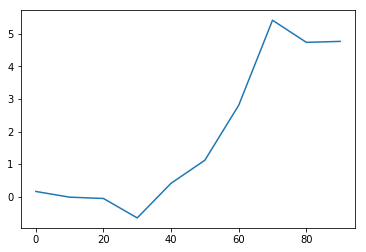

In [2]:
s = Series(np.random.randn(10).cumsum(), 
          index = np.arange(0, 100, 10))
s.plot()

In [3]:
s

0     0.161529
10   -0.013734
20   -0.053930
30   -0.650115
40    0.412410
50    1.119750
60    2.805460
70    5.413100
80    4.734852
90    4.764512
dtype: float64

- index를 그래프의 축으로 사용
- use_index = False 옵션으로 색인을 축으로 사용 방지 가능

In [2]:
df = DataFrame(np.random.randn(10,4).cumsum(0),
              index = np.arange(0, 100, 10),
              columns = list("ABCD"))
df

,A,B,C,D
0,-1.263412,-1.200547,-0.589251,-0.643716
10,-1.722565,-0.760853,-0.780485,-1.436324
20,-1.782956,-1.133281,-0.218284,-0.640959
30,-0.555590,-1.169639,0.334981,-0.770275
40,-0.894179,-1.828343,1.842903,0.051435
50,-1.382258,-1.565911,1.542150,-0.822884
60,-1.486034,-1.704788,2.216384,-1.254871
70,0.385890,-0.793436,1.955068,-1.202093
80,0.207762,-0.813995,1.367170,-2.125227
90,0.257704,1.266721,1.195508,-2.125852


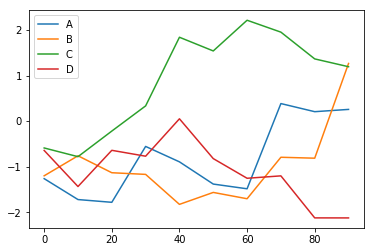

In [3]:
df.plot()

- Series.plot 메서드 인자

| 인자 | 설명 |
| --- | --- |
| label | 범례명 |
|ax| 서브플롯 객체|
|style|'ko--' 같은 스타일의 문자열|
|alpha|그래프 투명도 0-1|
|kind|그래프 종류 'line, 'bar', 'barh', 'kde'|
|logy|Y에 대한 로그 스케일링|
|use_index|     객체의 색인을 눈금 이름으로 사용할 지 여부|
|rot|눈금 이름을 로테이션 0-360|
|xticks|x 축으로 사용 할 값|
|yticks|y 축으로 사용할 값|
|xlim|x축 한계|
|ylim|y축 한계|
|grid| 그리드를 표실할 지 여부 (default = True)|

- DataFrame에서의 plot 옵션

|인자|설명|
|---|---|
|subplots| 각 DF의 칼럼을 독립된 서브플롯에 그림|
|sharex|subplots = True면 같은 X축을 공유|
|sharey|sharey = True면 같은 y 축을 공유|
|figsize| 그래프의 크기를 튜플로 지정|
|title|그래프의 제목을 문자열로 지정|
|legend|서브플롯의 범례를 추가|
|sort_columns|칼럼을 알파벳 순서로 표기|
___
## 2. 막대 그래프

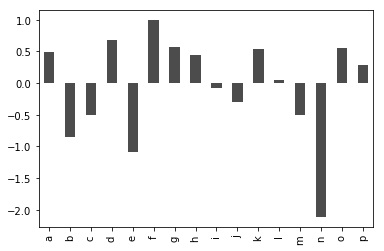

In [12]:
data = Series(randn(16), index = list('abcdefghijklmnop'))

data.plot(kind = 'bar',  color = 'k', alpha = 0.7)


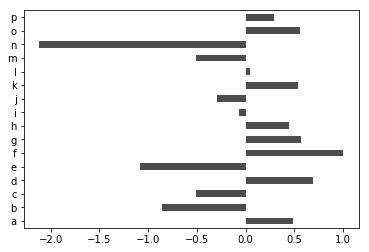

In [13]:
data.plot(kind = 'barh', color = 'k', alpha = 0.7)

In [14]:
df = DataFrame(np.random.rand(6,4),
              index = ['one', 'two', 'three', 'four', 'five', 'six'],
              columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))
df

Genus,A,B,C,D
one,0.124341,0.698515,0.396653,0.433148
two,0.795604,0.510152,0.542326,0.189888
three,0.977736,0.838501,0.425079,0.878083
four,0.474007,0.659712,0.223668,0.565679
five,0.803833,0.332946,0.767865,0.981973
six,0.604312,0.646241,0.202604,0.951765


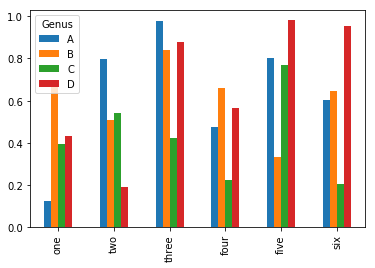

In [15]:
df.plot(kind = 'bar')

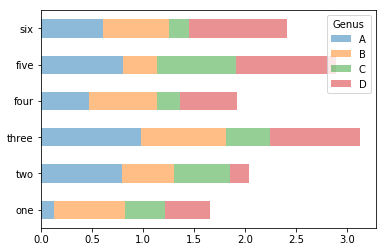

In [17]:
df.plot(kind = 'barh', stacked = True, alpha = 0.5)

In [20]:
tips = pd.read_csv('data/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [19]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [26]:
party_counts = party_counts.iloc[:, 1:5]

In [27]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis = 0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


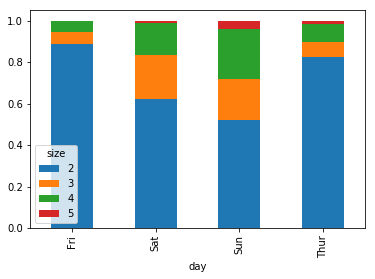

In [28]:
party_pcts.plot(kind = 'bar', stacked = True)

___
## 3. 히스토그램과 밀도 그래프

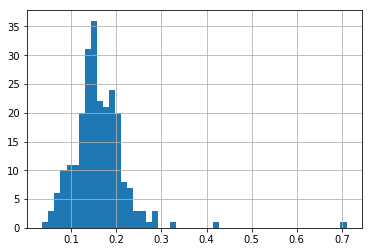

In [30]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins = 50)

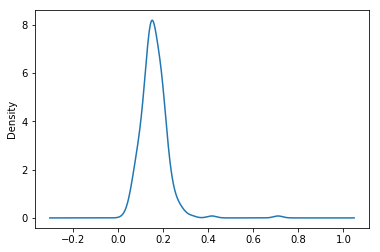

In [31]:
tips['tip_pct'].plot(kind = 'kde')

In [33]:
comp1 = np.random.normal(0, 1, size = 200)
comp2 = np.random.normal(10, 2, size = 200)
values = Series(np.concatenate([comp1, comp2]))
values.head()

0   -0.812231
1    0.570144
2   -0.930061
3    0.384091
4    1.610014
dtype: float64

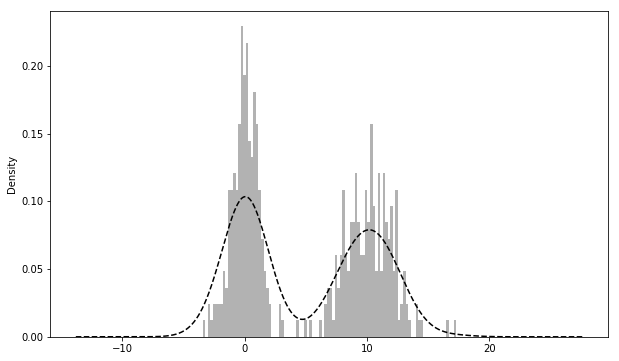

In [36]:
values.hist(bins = 100, alpha = 0.3, color = 'k', normed = True)
values.plot(kind = 'kde', style = 'k--')

___
## 4. 산포도

In [41]:
macro = pd.read_csv('data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 vs. log unemp')

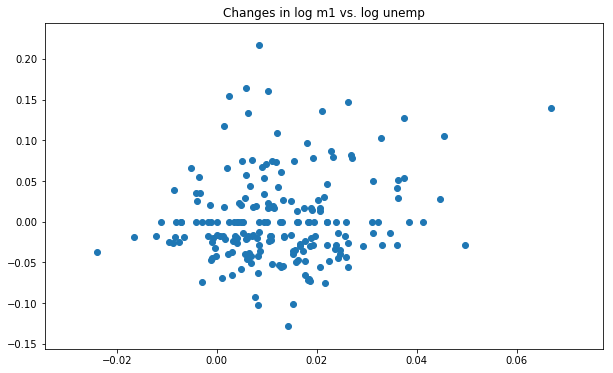

In [45]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

C:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017FA44EABA8>,
      dtype=object)

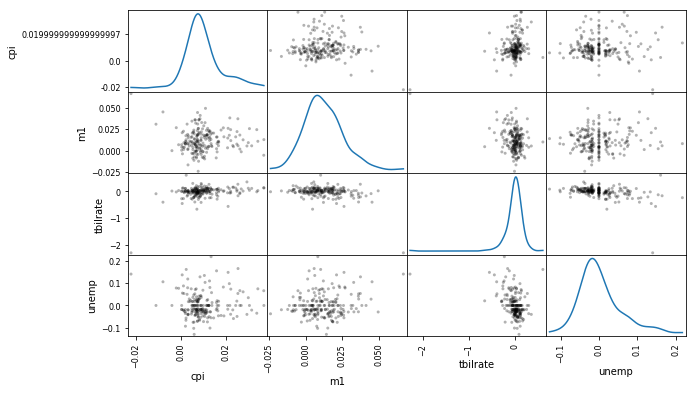

In [46]:
pd.scatter_matrix(trans_data, diagonal = 'kde', color = 'k', alpha = 0.3)